# Exploratory Data Analysis

* The inputs here are: The corpus and the Document Matrix
* The goal of EDA is to summarize the main characteristics of the dataset, preferably in a visual way
* The output is to figure out the main trends in our dataset and see if our data makes sense 

## Ways of exploring our data

1. Top words: Find the most common words for each comedian
2. Vocabulary: Take a look at the unique number of words
3. Amount of profanity: Note the number of swear words
4. Frequency counts(word counts) etc.



### 1. Top Words

## EDA STEPS
1. Data- We will use the document-term matrix 
2. Aggregate our data to find the top words, for each comedian select the columns with the largest values

3. Best ways to visualize the top words
*  Word clouds (If your word clouds don't make sense, do more cleaning, i.e. if your word clouds contains common words like: the, you, etc, do more cleaning)
4. Insights - Take a look at the visualizations, does it make sense, do you have to clean your data some more, what are some initial findings, How are comedians different from each other.

### Follow EDA for Top Words, Vocabulary, and Amount of profanity

In [1]:
#Read in the document-term matrix 

import pandas as pd
data = pd.read_pickle("dtm.pkl")
data = data.transpose() #We transposed because it is easier to do things across rows than columns
data.sample(5)

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
felt,2,0,5,3,4,3,0,0,1,0,4,3
writes,0,0,0,0,0,0,0,0,0,0,1,0
du,0,0,0,0,0,0,0,0,2,0,0,0
generational,0,0,0,0,0,3,0,0,0,0,0,0
stripping,0,0,0,0,0,0,1,0,0,0,0,0


In [2]:
#Find the top30 words said by each comedian.
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
    
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('gotta', 21),
  ('wanna', 21),
  ('husband', 20),
  ('time', 19),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('god', 14),
  ('half', 14),
  ('asian', 14),
  ('need', 14),
  ('tell', 13),
  ('yeah', 13)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('right', 18),
  ('grandma', 18),
  ('thing', 17),
  ('think', 17),
  ('time', 17),
  ('yeah', 16),
  ('jokes', 16),
  ('did', 16),
  ('school', 16),
  ('good', 16),
  ('okay', 15),
  ('gonna', 15),
  ('baby', 15),
  ('ive', 15)],
 '

In [3]:
#print the top 15 words said by each comedian:

for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, gotta, wanna
---
anthony
im, like, know, dont, joke, got, thats, said, anthony, just, day, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, im, love, think, just, bo, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, ah, said, just, im, shit, people, didnt, dont, time, thats, fuck, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, hasan, shes
---
jim
like, im, dont, right, fucking, just, know, went, youre, people, thats, oh, day, think
---
joe
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, old, thats, right, youre, little, hey, time
---
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, theres, cause
---
mike
like, im, know, said, just, dont, think, thats

* NOTE: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'oh',
 'gotta',
 'wanna',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'hes',
 'god',
 'half',
 'asian',
 'need',
 'tell',
 'yeah',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'right',
 'grandma',
 'thing',
 'think',
 'time',
 'yeah',
 'jokes',
 'did',
 'school',
 'good',
 'okay',
 'gonna',
 'baby',
 'ive',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'think',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'old',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'said',
 'eye',
 'people',
 'fucking'

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('time', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('theyre', 5),
 ('theres', 5),
 ('did', 4),
 ('fuck', 4),
 ('really', 4),
 ('ive', 3),
 ('old', 3),
 ('make', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('dude', 2),
 ('guy', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('half', 1),
 ('asian', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('j

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'think',
 'oh',
 'time',
 'yeah',
 'said']

* All the words above will be added to our stop words since more than half of the comedians have these words as part of their top 30 words.


In [7]:
#Updating our Document-Term Matrix with the new list of our stop words. 

from sklearn.feature_extraction import text  #text is what actually contains the stop words list
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
#Read in clean data

data_clean = pd.read_pickle('data_clean.pkl')


In [9]:
#Add new stop words
#There are already english stop words, so we will be adding(UNION) our own stop words to the english stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [10]:
#Recreate the documen-term matrix with new stop words

cv = CountVectorizer(stop_words = stop_words )
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index

In [11]:
#Pickle it for later use 
import pickle

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [15]:
#Let's make some word clouds 
#if you haven't already, do "pip install wordcloud", or the next steps will not work

from wordcloud import WordCloud

#creating a wordcloud object
wc = WordCloud(stopwords = stop_words, background_color = 'white', colormap = 'Dark2', max_font_size = 150, random_state = 42)

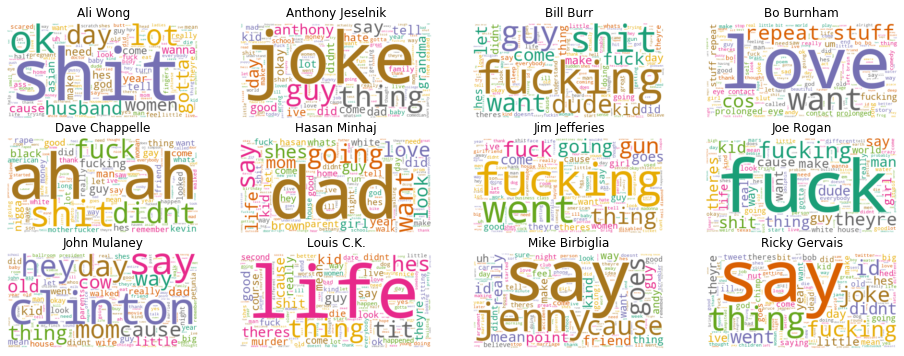

In [19]:
#Reset the output dimensions and plotting the wordcloud
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))


full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

#create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(full_names[index])
    
plt.show()

## Findings

* Ali Wong says the s-word a lot,
* Most of the other comedians also say the f-word a lot, basically there is a lot of profanity in comedy

# 2. Unique Words
## Number of Words, we want to see how big of a vocabulary everyone has 

### Analysis

In [21]:
# Identify the non-zero items in the document-term matrix, meaning that the words that occur at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,978
9,Louis C.K.,1089
3,Bo Burnham,1275
6,Jim Jefferies,1312
0,Ali Wong,1333
8,John Mulaney,1395
4,Dave Chappelle,1398
7,Joe Rogan,1428
10,Mike Birbiglia,1492
5,Hasan Minhaj,1565


In [22]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,978,2916,59,49.423729
3,Bo Burnham,1275,3186,60,53.100000
0,Ali Wong,1333,3327,60,55.450000
9,Louis C.K.,1089,3354,58,57.827586
4,Dave Chappelle,1398,4155,67,62.014925
6,Jim Jefferies,1312,4777,77,62.038961
10,Mike Birbiglia,1492,4764,76,62.684211
11,Ricky Gervais,1632,4989,79,63.151899
8,John Mulaney,1395,4053,62,65.370968
5,Hasan Minhaj,1565,4809,73,65.876712


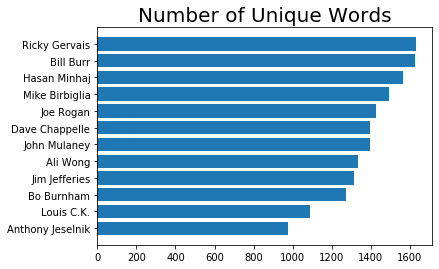

In [40]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 1, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.show()

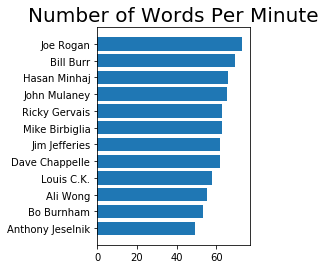

In [39]:
plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)
plt.show()



## Findings
### Vocabulary
* Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
* Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary

### Talking Speed
* Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
* Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
* Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

# 3. Amount of Profanity


### Analysis

In [41]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('time', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('theyre', 5),
 ('theres', 5),
 ('did', 4),
 ('fuck', 4),
 ('really', 4),
 ('ive', 3),
 ('old', 3),
 ('make', 3),
 ('man', 3),
 ('little', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('dude', 2),
 ('guy', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('half', 1),
 ('asian', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('j

In [43]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,11
bill,107,63
bo,37,6
dave,65,45
hasan,25,15
jim,116,21
joe,135,40
john,4,6
louis,21,26


* Insterestingly Mike doesn't swear at all

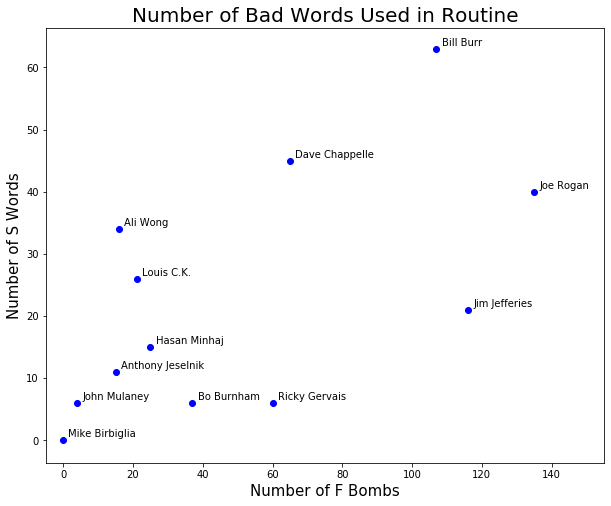

In [44]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

## Findings
* Averaging 2 F-Bombs Per Minute! - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* Clean Humor - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.


## Side Note
* What was our goal for the EDA portion of our journey? To be able to take an initial look at our data and see if the results of some basic analysis made sense.

* My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

* As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

* Alice's data science (and life) motto: Let go of perfectionism!